<h1 align='center'> 영상처리 프로그래밍 실습 6</h1>

<h6 align='right'> 2022. 4. 14. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름: 김성문  &nbsp;&nbsp;          학번: 20175115   &nbsp;&nbsp;         학과(전공): 빅데이터전공
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 4월 18일 (월) 오후 6:00까지 최종본을 SmartLEAD제출


In [3]:
import cv2
import matplotlib.pyplot as plt

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.5.2
NumPy version 1.20.3


## 지난 주 문제 1.

다음 조건을 모두 만족하는 프로그램을 작성하라.

- 'clock_150.jpg' 파일을 읽고, cv2.imshow 함수를 이용하여 "Clock" title을 가진 윈도우에 영상을 표시한다.
- "Clock" 윈도우 위에 마우스 오른쪽 버튼을 누르면 영상이 가로 세로 방향으로 조금씩 확대된다. 단, 최대 5 배 이상을 넘으면 더 이상 영상은 확대되지 않는다.
- "Clock" 윈도우 위에 마우스 왼쪽 버튼을 누르면 영상이 가로 세로 방향으로 조금씩 축소된다. 단, 원래 영상 크기보다 작아지면 안된다.
- 다음 숫자를 누르면 영상 확대 시 interpolation 옵션은 키보드의 숫자를 눌러서 지정한다.
  - 1: Nearest-neighbor interpolation
  - 2: Bilinear interpolation
  - 3: Cubic interpolation 

In [7]:
def onMouse(event, x, y, flags, param):
    global img2, val
     
    if event == cv2.EVENT_RBUTTONDOWN:
        if val < MAX_VAL:
            val = val + 1
    elif event == cv2.EVENT_LBUTTONDOWN:
        if val > 1:
            val = val - 1
    width = img.shape[1]*val
    height = img.shape[0]*val
    cv2.resizeWindow(winName, width, height)
    img2 = cv2.resize(img, (height, width), cv2.INTER_LINEAR)
    cv2.imshow(winName, img2)


def get_top_left_coordinate(val):
    space_x = (WIDTH - img.shape[1]*val)
    space_y = (HEIGHT - img.shape[0]*val)
    return space_x//2, space_y//2


file_name = 'clock_150.jpg'
img = cv2.imread(file_name)
val = 1
MAX_VAL = 5

img2 = img.copy()

winName = "Up-sampling an image"
cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL )
cv2.imshow(winName, img2)

cv2.setMouseCallback(winName, onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 예제 1. 
bird.jpg' 파일을 읽고, 이 영상의 R, G, B 성분의 히스토그램을 그래프로 표시하라.
### 1.1 NumnPy 배열로부터 직접 히스토그램을 구하는 방법


In [2]:
bird = cv2.imread('bird.png')

In [3]:
bird.shape, bird.min(), bird.max()

((425, 640, 3), 0, 255)

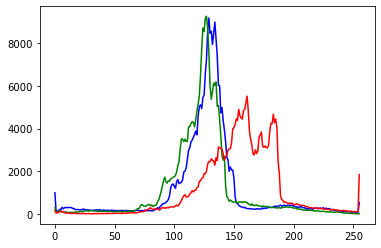

In [4]:
# ... -> 처음부터 끝까지
hist_B = [bird[..., 0][bird[...,0]==n].size for n in range(256)]
hist_G = [bird[..., 1][bird[...,1]==n].size for n in range(256)]
hist_R = [bird[..., 2][bird[...,2]==n].size for n in range(256)]

plt.plot(range(256), hist_B, 'b')
plt.plot(range(256), hist_G, 'g')
plt.plot(range(256), hist_R, 'r')
plt.show()

### 1.2 skimage.exposure 모듈의 histogram을 이용한 방법

In [6]:
from skimage.exposure import histogram
help(histogram)

Help on function histogram in module skimage.exposure.exposure:

histogram(image, nbins=256, source_range='image', normalize=False)
    Return histogram of image.
    
    Unlike `numpy.histogram`, this function returns the centers of bins and
    does not rebin integer arrays. For integer arrays, each integer value has
    its own bin, which improves speed and intensity-resolution.
    
    The histogram is computed on the flattened image: for color images, the
    function should be used separately on each channel to obtain a histogram
    for each color channel.
    
    Parameters
    ----------
    image : array
        Input image.
    nbins : int, optional
        Number of bins used to calculate histogram. This value is ignored for
        integer arrays.
    source_range : string, optional
        'image' (default) determines the range from the input image.
        'dtype' determines the range from the expected range of the images
        of that data type.
    normalize : boo

In [7]:
hist, hist_centers = histogram(bird)  # 1. 각 화소의 빈도 배열, 2. 화소의 화소값과 최대값 까지의 배열
hist_centers

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_14700/4002073407.py:1: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, hist_centers = histogram(bird)  # 1. 각 화소의 빈도 배열, 2. 화소의 화소값과 최대값 까지의 배열


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

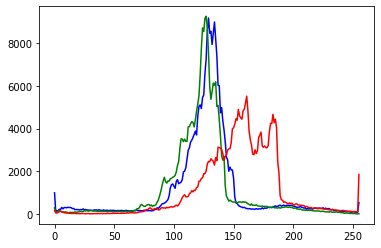

In [7]:
hist_B, hist_center_B = histogram(bird[...,0])
hist_G, hist_center_G = histogram(bird[...,1])
hist_R, hist_center_R = histogram(bird[...,2])
plt.plot(hist_center_B, hist_B, 'b')
plt.plot(hist_center_G, hist_G, 'g')
plt.plot(hist_center_R, hist_R, 'r')
plt.show()

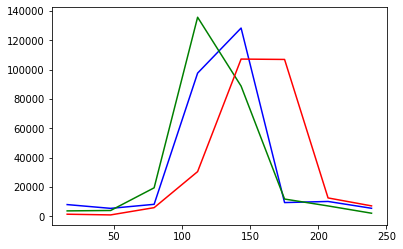

In [8]:
hist_B, hist_center_B = histogram(bird[...,0].astype(float), nbins=8)  # 8개로 나눈다
hist_G, hist_center_G = histogram(bird[...,1].astype(float), nbins=8)
hist_R, hist_center_R = histogram(bird[...,2].astype(float), nbins=8)
plt.plot(hist_center_B, hist_B, 'b')
plt.plot(hist_center_G, hist_G, 'g')
plt.plot(hist_center_R, hist_R, 'r')
plt.show()

In [9]:
hist_center_B, hist_B

(array([ 15.9375,  47.8125,  79.6875, 111.5625, 143.4375, 175.3125,
        207.1875, 239.0625]),
 array([  7932,   5361,   8113,  97544, 128273,   9304,  10063,   5410],
       dtype=int64))

### 1.3 OpenCV의 calcHist를 이용한 방법

In [21]:
help(cv2.calcHist)

Help on built-in function calcHist:

calcHist(...)
    calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
    .   @overload



In [8]:
hist_B = cv2.calcHist([bird], [0], None, [256], [0, 256])
hist_G = cv2.calcHist([bird], [1], None, [256], [0, 256])
hist_R = cv2.calcHist([bird], [2], None, [256], [0, 256])

In [9]:
hist_B.shape

(256, 1)

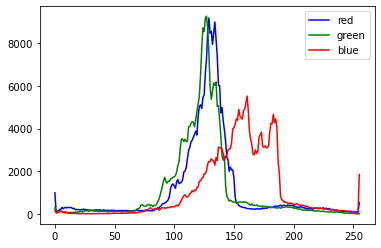

In [13]:
plt.plot(range(256), hist_B, 'b', label = 'red')
plt.plot(range(256), hist_G, 'g', label = 'green')
plt.plot(range(256), hist_R, 'r', label = 'blue')
plt.legend()
plt.show()

## 예제 2.
영상의 로그 변환은 다음과 같은 식으로 표현된다.

$$ g(x,y) = \frac{255}{\log(1+\max\{f(x,y)\}} \log\{1+f(x,y)\}$$

### 2.1 
로그 변환 함수의 그래프를 그려라.

In [14]:
np.round(258.623).clip(0,155)  # clip은 구간을 정해줌

155.0

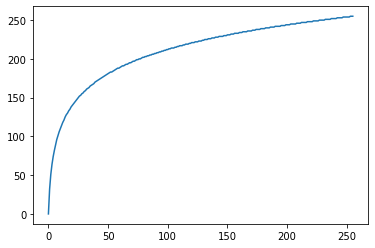

In [14]:
def log_transformation(r):
    C = 255 / np.log(256)
    s = (C * np.log(1. + r)).round(0).clip(0,255).astype(np.uint8)      # 실수가 나오기 때문에 정수로 바꾸어야함
    return s

r = np.arange(256)
s = log_transformation(r)

plt.plot(r, s)
plt.show()

### 2.2 
Lookup table 방식을 이용한 로그 변환 함수를 작성하라.

In [7]:
def lookupTable(r, lut):     # 0~255까지 로그변환이 되어있는 값들을 인덱싱을 이용하여 가져온다
    return lut[r]   
 
r = np.arange(256)
C = 255 / np.log(256)
s = (C * np.log(1. + r)).round(0).clip(0,255).astype(np.uint8)
# \ 문장줄 바꾸기
log_lut = np.array([(C * np.log(1. + r)).round(0).clip(0,255).astype(np.uint8) \
                   for r in range(256)])    # 런타임 계산을 인덱싱 조작으로 하기 위한 배열

a = [1,2,3,4,5,120,210,255,147,145]
b = lookupTable(a, log_lut)
b

array([ 32,  51,  64,  74,  82, 221, 246, 255, 230, 229], dtype=uint8)

### 2.3 
- bird.png, forest.jpg, grass.jpg 영상에 log 변환을 적용한 후에 원 영상과 변환 영상을 나란히 표시하라. (단, BGR 영상을 다음 몇 가지 color 공간으로 변환한 후에 특정 성분만 변환한 후에 다시 BGR 성분으로 변환하는 방법도 사용하라.)
  - RGB
  - Luv
  - Lab
  - YUV

- 위에서 사용한 변환 전 후 영상의 R, G, B 성분별 히스토그램을 비교하라.

In [16]:
cv2dir = dir(cv2)
[e for e in cv2dir if 'COLOR_' in e]

['CAP_PROP_XI_COLOR_FILTER_ARRAY',
 'COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_

- BGR : BLUE, GREEN, RED
- BGRA : BGR + ALPHA(투명도)
- RGB : RED, GREEN, BLUE
- RGBA : RGB + ALPHA(투명도)
- GRAY : 회색조 이미지
- BGR565 : BGR 16비트 이미지
- XYZ : X, Y, Z채널 CIE XYZ(CIE 1931 색공간)
- YCrCb : Y(휘도 : 밝기), Cb/Cr(색채, 크로마 : 색상 성분) 
- HSV : Hue(색상), Saturation(채도), Value(밝기)으로 변환
- Lab : CIE Lab으로 변환 : L(밝기), A: RED-GREEN 색상 정도, B : YELLOW-BLUE 색상 정도
- Luv : CIE Luv으로 변환
- HLS : Hue(색상), Lightness(밝기), Saturation(채도)
- YUV : Y(밝기), U(밝기와 파란색과의 색상 차), V(밝기와 빨간색과의 색상 차)

In [6]:
def show_two_images(img1, img2):
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.imshow(img1[...,::-1])
    plt.subplot(122)
    plt.imshow(img2[...,::-1])
    plt.show()

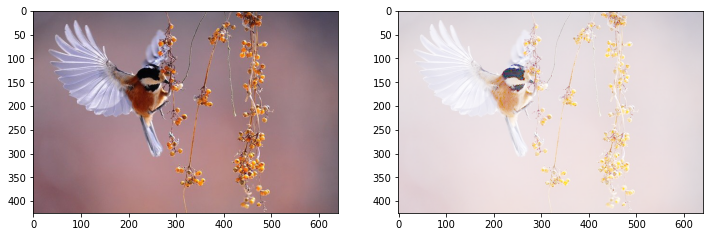

In [18]:
# log 변환 후 영상 확인
bird = cv2.imread('bird.png')
bird_log = lookupTable(bird, log_lut)
show_two_images(bird, bird_log)

In [44]:
help(cv2.LUT)

Help on built-in function LUT:

LUT(...)
    LUT(src, lut[, dst]) -> dst
    .   @brief Performs a look-up table transform of an array.
    .   
    .   The function LUT fills the output array with values from the look-up table. Indices of the entries
    .   are taken from the input array. That is, the function processes each element of src as follows:
    .   \f[\texttt{dst} (I)  \leftarrow \texttt{lut(src(I) + d)}\f]
    .   where
    .   \f[d =  \fork{0}{if \(\texttt{src}\) has depth \(\texttt{CV_8U}\)}{128}{if \(\texttt{src}\) has depth \(\texttt{CV_8S}\)}\f]
    .   @param src input array of 8-bit elements.
    .   @param lut look-up table of 256 elements; in case of multi-channel input array, the table should
    .   either have a single channel (in this case the same table is used for all channels) or the same
    .   number of channels as in the input array.
    .   @param dst output array of the same size and number of channels as src, and the same depth as lut.
    .   @sa  

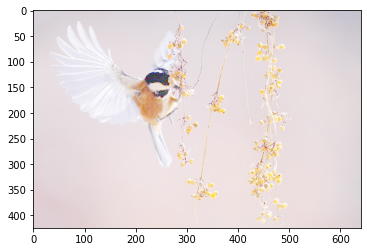

In [43]:
a = cv2.LUT(bird[...,::-1], log_lut)
plt.imshow(a)
plt.show()

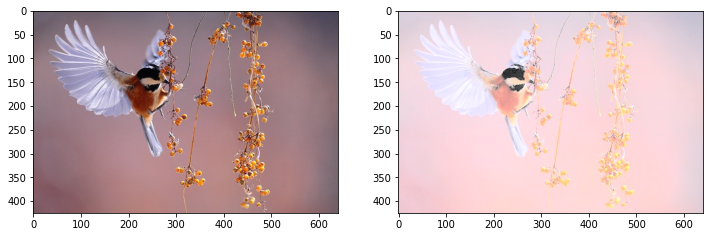

In [26]:
# Luv 채널 변환 -> L채널만 log 변환 -> BGR채널로 변경
bird_Luv = cv2.cvtColor(bird, cv2.COLOR_BGR2Luv)   # Luv형식으로 으로 변환
bird_Luv[...,0] = lookupTable(bird_Luv[...,0], log_lut)  # L부분만 로그 변환
bird_Luv_log = cv2.cvtColor(bird_Luv, cv2.COLOR_Luv2BGR) # L부분만 변환된 영상을 Luv에서 BGR로 변환
show_two_images(bird, bird_Luv_log)

## 예제 3.
영상의 gamma 변환은 다음과 같은 식으로 표현된다.

$$s = 255^{1-\gamma} c^\gamma$$

### 2.1 
아래 gamma 값에 대해서 감마 변환 함수의 그래프를 그려라.

$$\gamma = 1/4, 1/3, 1/2, 1, 3/2, 2, 5/2$$

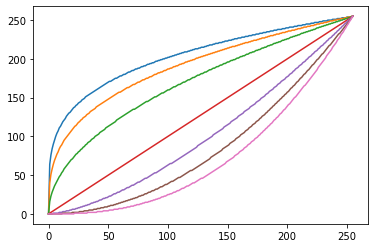

In [22]:
def gamma_lut(gamma):
    out = 255**(1-gamma) * np.arange(256)**gamma        # 감마 변환
    return out.round(0).clip(0,255).astype(np.uint8)    # 정수로 변환

gammas = (1/4,1/3,1/2,1,3/2,2,5/2)

for n, gamma in enumerate(gammas):   # enumerate: 인덱스와 원소값을 가져올 수 있는 함수, start 디폴트 값은 0
    s = gamma_lut(gamma)
    plt.plot(s)

### 3.2
cv2.imread 함수를 이용해서 'grass.jpg' 파일을 읽고, gamma 값을 조정하면서 gamma 변환한 영상을 표시하라.

In [23]:
grass = cv2.imread('grass.jpg')

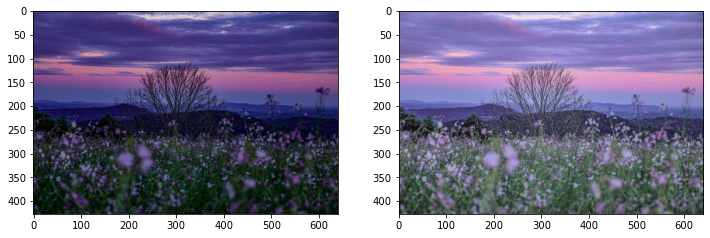

In [28]:
lut_gamma = gamma_lut(0.5)    # 1보다 작아지면 밝아지고 커지면 어두워짐

grass_YUV = cv2.cvtColor(grass, cv2.COLOR_BGR2YUV)           # YUV 채널로 바꿈
grass_YUV[...,0] = lookupTable(grass_YUV[...,0], lut_gamma)  # Y채널만 gamma 변환
grass_YUV_log = cv2.cvtColor(grass_YUV, cv2.COLOR_YUV2BGR)   # 다시 BGR채널로 변환

show_two_images(grass, grass_YUV_log)

In [ ]:
help(cv2.circle)

## Extra 예제

- RGB --> YCrCb --> Y만 Histogram equalize
- YCrCb --> RGB --> HSV --> S와 V를 Histogram equalize
- HSV --> RGB

- 컬러영상에 히스토그램 평활화를 적용할 때에는 RGB 값에 바로 적용하면 색이 변할 수 있다.
- HSV 또는 YCrCb 형태의 이미지로 변경한 다음에 밝기값 채널을 변경해야 색을 변경하지 않고 선명하게 만들 수 있다.

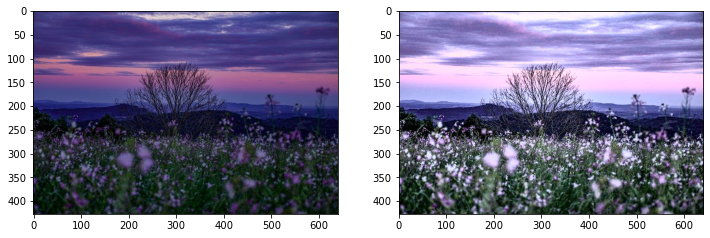

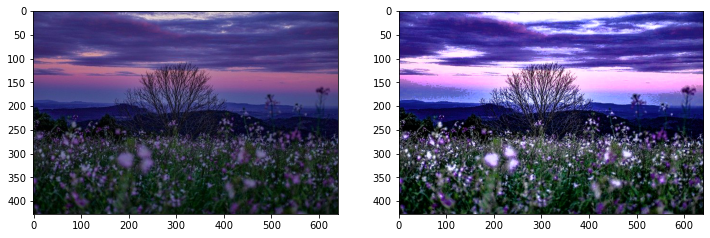

In [9]:
grass = cv2.imread('grass.jpg')
grass_YCrCb = cv2.cvtColor(grass, cv2.COLOR_BGR2YCrCb)          # YCrCb 채널로 변경
grass_YCrCb[...,0] = cv2.equalizeHist(grass_YCrCb[...,0])       # Y채널만 히스토그램 평활화
grass_1 = cv2.cvtColor(grass_YCrCb, cv2.COLOR_YCrCb2BGR)        # 다시 BGR채널로 변경
grass_1_HSV = cv2.cvtColor(grass_1, cv2.COLOR_BGR2HSV)          # 위의 영상을 HSV채널로 변경
grass_1_HSV[...,1] = cv2.equalizeHist(grass_1_HSV[...,1])       # S 채널 히스토그램 평활화
grass_1_HSV[...,2] = cv2.equalizeHist(grass_1_HSV[...,2])       # V 채널 히스토그램 평활화
grass_2 = cv2.cvtColor(grass_1_HSV, cv2.COLOR_HSV2BGR)          # 다시 BGR채널로 변경

show_two_images(grass, grass_1)
show_two_images(grass, grass_2)

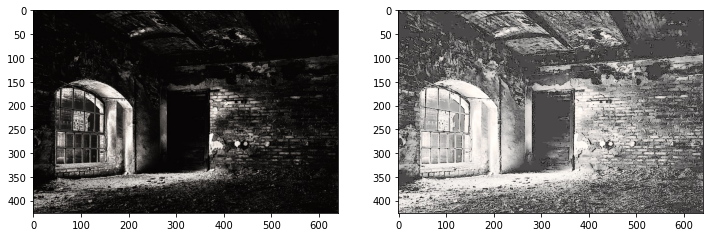

In [56]:
grass = cv2.imread('basement.jpg')
grass_YCrCb = cv2.cvtColor(grass, cv2.COLOR_BGR2YCrCb)          # YCrCb 채널로 변경
grass_YCrCb[...,0] = cv2.equalizeHist(grass_YCrCb[...,0])       # Y채널만 히스토그램 평활화
grass_1 = cv2.cvtColor(grass_YCrCb, cv2.COLOR_YCrCb2BGR)        # 다시 BGR채널로 변경
grass_1_HSV = cv2.cvtColor(grass_1, cv2.COLOR_BGR2HSV)          # 위의 영상을 HSV채널로 변경
grass_1_HSV[...,1] = cv2.equalizeHist(grass_1_HSV[...,1])       # S 채널 히스토그램 평활화
grass_1_HSV[...,2] = cv2.equalizeHist(grass_1_HSV[...,2])       # V 채널 히스토그램 평활화
grass_2 = cv2.cvtColor(grass_1_HSV, cv2.COLOR_HSV2BGR)          # 다시 BGR채널로 변경

show_two_images(grass, grass_1)

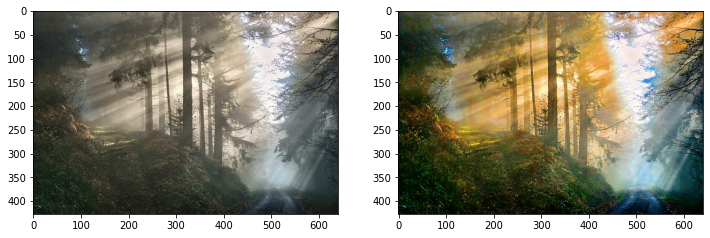

In [60]:
grass = cv2.imread('forest.jpg')
grass_YCrCb = cv2.cvtColor(grass, cv2.COLOR_BGR2YCrCb)          # YCrCb 채널로 변경
grass_YCrCb[...,0] = cv2.equalizeHist(grass_YCrCb[...,0])       # Y채널만 히스토그램 평활화
grass_1 = cv2.cvtColor(grass_YCrCb, cv2.COLOR_YCrCb2BGR)        # 다시 BGR채널로 변경
grass_1_HSV = cv2.cvtColor(grass_1, cv2.COLOR_BGR2HSV)          # 위의 영상을 HSV채널로 변경
grass_1_HSV[...,1] = cv2.equalizeHist(grass_1_HSV[...,1])       # S 채널 히스토그램 평활화
grass_1_HSV[...,2] = cv2.equalizeHist(grass_1_HSV[...,2])       # V 채널 히스토그램 평활화
grass_2 = cv2.cvtColor(grass_1_HSV, cv2.COLOR_HSV2BGR)          # 다시 BGR채널로 변경

show_two_images(grass, grass_2)

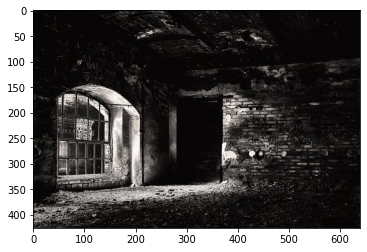

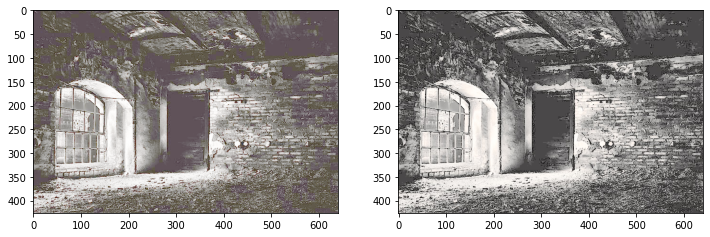

In [66]:
bird = cv2.imread('basement.jpg')
bird_log = lookupTable(bird, log_lut)
bird_YCrCb = cv2.cvtColor(bird, cv2.COLOR_BGR2YCrCb)
bird_YCrCb[...,0] = cv2.equalizeHist(bird_YCrCb[...,0])
bird_hist = cv2.cvtColor(bird_YCrCb, cv2.COLOR_YCR_CB2BGR)

plt.imshow(bird[...,::-1])
show_two_images(bird_log, bird_hist)
bird = cv2.imread('bird.png')

## 예제 4.
다음 세 가지 방법으로 구현한 감마 변환 함수의 평균 실행 시간을 비교하는 프로그램을 작성하라.
- 영상을 표현하는 NumPy 배열에 직접 감마 변환 연산을 적용하는 경우
- NumPY 배열로 lookup table을 만들고, boolean indexing을 이용하는 경우
- OpenCV의 LUT 함수를 사용하는 경우

In [103]:
%%timeit
# 영상을 표현하는 NumPy 배열에 직접 감마 변환 연산을 적용하는 경우
gam = 0.2
bird_gam = (255**(1-gam)*(bird**gam)).round(0).clip(0,255).astype(np.uint8)  

96.3 ms ± 735 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [109]:
%%timeit
#NumPY 배열로 lookup table을 만들고, boolean indexing을 이용하는 경우
bird_lut = lookupTable(bird, gamma_lut(0.3))
bird_bool = bird_lut[...,0] > 200

3.18 ms ± 197 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [110]:
%%timeit
#OpenCV의 LUT 함수를 사용하는 경우
cv2.LUT(bird[...,::-1], gamma_lut(0.3))

1.86 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 예제 5.
- 'basement.jpg' 파일을 읽고 히스토그램 평활화를 적용한 영상을 만들고, 원 영상과 나란히 표시하라.
  - 컬러 영상을 직접 히스토그램 평활화한 영상과 컬러 공간을 변경한 후에 특정 성분에만 히스토그램 평활화한 영상과 특성을 비교하라.
- 히스토그램 평활화 전, 후의 영상의 컬러 히스토그램을 그려라.

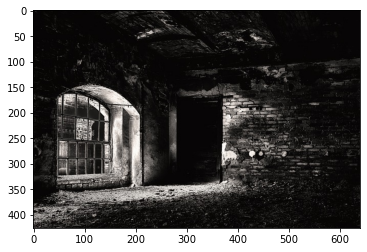

In [30]:
basement = cv2.imread('basement.jpg')
plt.imshow(basement[...,::-1])

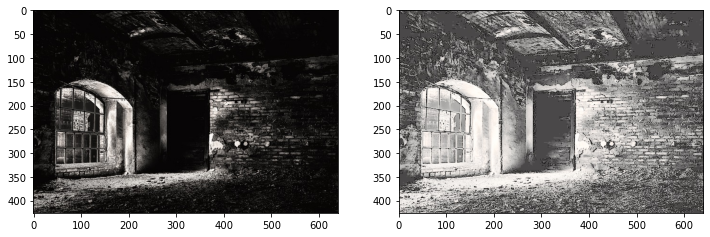

In [31]:
basement_YCrCb = cv2.cvtColor(basement, cv2.COLOR_BGR2YCrCb)    # YCrCb 채널로 변경
basement_YCrCb[...,0] = cv2.equalizeHist(basement_YCrCb[...,0]) # Y 채널만 히스토그램 평활화
basement_YCrCb_hist = cv2.cvtColor(basement_YCrCb, cv2.COLOR_YCrCb2BGR)  # BGR채널로 바꿈

show_two_images(basement, basement_YCrCb_hist)

## 문제 1.
오늘 실습에서 사용한 적당한 영상을 하나 읽어서 OpenCV를 이용해서 영상을 표시하는 윈도우를 만들고 slidebar 인터페이스를 사용하여 감마 변환의 gamma를 0.1부터 5 사이로 조절할 수 있도록 하고, 감마가 변경될 때마다 윈도우에 감마 변환된 영상이 표시되는 프로그램을 작성하라.

예: 0 ~ 255 --> 0.1 ~ 5

In [4]:
def lookupTable(r, lut):     # 0~255까지 로그변환이 되어있는 값들을 인덱싱을 이용하여 가져온다
    return lut[r]   
 
def gamma_lut(gamma):
    out = 255**(1-gamma) * np.arange(256)**gamma        # 감마 변환
    return out.round(0).clip(0,255).astype(np.uint8)    # 정수로 변환

In [33]:
def onChange(pos):
    global img, gam_list
    gam = gamma_int2gam(pos, gam_list)     # gamma 값을 pos 값과 매칭하여 설정
    lut_gamma = gamma_lut(gam)       # gamma값을 LUT를 이용하여 만듬
    grass_gam = cv2.LUT(grass, lut_gamma)  # lookup table을 이용해 감마변환
    img = grass_gam
    cv2.imshow(winname, img)

def gamma_int2gam(p, gam_lut):   # 0 ~ 255까지의 값을 0.1 ~ 5 까지의 값으로 매칭
    g = gam_lut[p]
    return np.round(g, 1)


grass = cv2.imread('grass.jpg')
img = grass.copy()
winname = 'Grass trackbar'

gam_list = np.linspace(0.1, 5, 256)    # trackbar는 최소값이 0이기 때문에 매칭하기위한 배열을 만듬

cv2.imshow(winname, img)
cv2.createTrackbar('step', winname, 47, 255, onChange)  # 47은 원영상과 가장 비슷한 곳

cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
days = [(day, day) for day in range(1, 32)]
days

[(1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 16),
 (17, 17),
 (18, 18),
 (19, 19),
 (20, 20),
 (21, 21),
 (22, 22),
 (23, 23),
 (24, 24),
 (25, 25),
 (26, 26),
 (27, 27),
 (28, 28),
 (29, 29),
 (30, 30),
 (31, 31)]